In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import networkx as nx

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Equation of Pathline for u = sint and v = 1 

C:\Users\HP\AppData\Local\Temp\ipykernel_29380\2428192545.py:2: RuntimeWarning: invalid value encountered in arccos
  y = y_p + np.arccos(-x+x_p+1)


Text(0.5, 1.0, 'Pathlines for the given velocity field from random points at t=0')

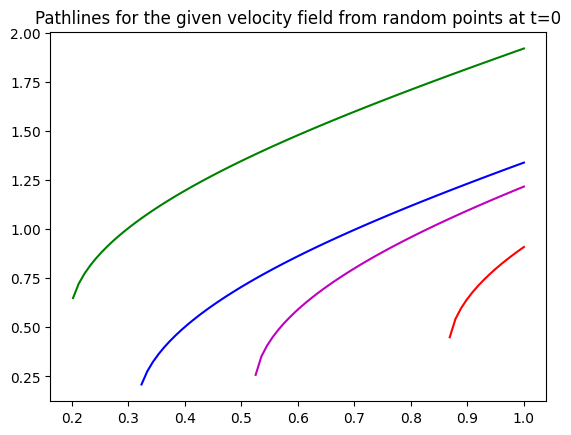

In [3]:

def path(x,x_p,y_p):
    y = y_p + np.arccos(-x+x_p+1)
    val = np.clip(-x + x_p + 1, -1, 1)
    return y

x = np.linspace(0,1,100)
x_0 = np.random.rand(4)
y_0 = np.random.rand(4)
plt.plot(x, path(x,x_0[0],y_0[0]),'r-')
for i in range(4):
    plt.plot(0, path(0, x_0[i], y_0[i]), 'ko') 
plt.plot(x, path(x,x_0[1],y_0[1]),'b-')
plt.plot(x, path(x,x_0[2],y_0[2]),'g-')
plt.plot(x, path(x,x_0[3],y_0[3]),'m-')
plt.title("Pathlines for the given velocity field from random points at t=0")

# Equation of pathlines for uniform fluid flow i.e u = 2 and v = 3

Text(0.5, 1.0, 'Pathlines for the given velocity field from random points at t=0')

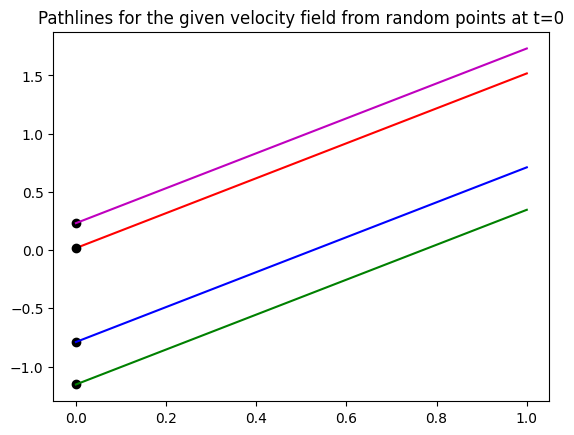

In [5]:
def path(x,x_p,y_p):
    y = (3*x -3*x_p + y_p)/2
    return y

x = np.linspace(0,1,100)
x_0 = np.random.rand(4)
y_0 = np.random.rand(4)
plt.plot(x, path(x,x_0[0],y_0[0]),'r-')
for i in range(4):
    plt.plot(0, path(0, x_0[i], y_0[i]), 'ko') 
plt.plot(x, path(x,x_0[1],y_0[1]),'b-')
plt.plot(x, path(x,x_0[2],y_0[2]),'g-')
plt.plot(x, path(x,x_0[3],y_0[3]),'m-')
plt.title("Pathlines for the given velocity field from random points at t=0")

# Equation of pathlines in a double gyre model

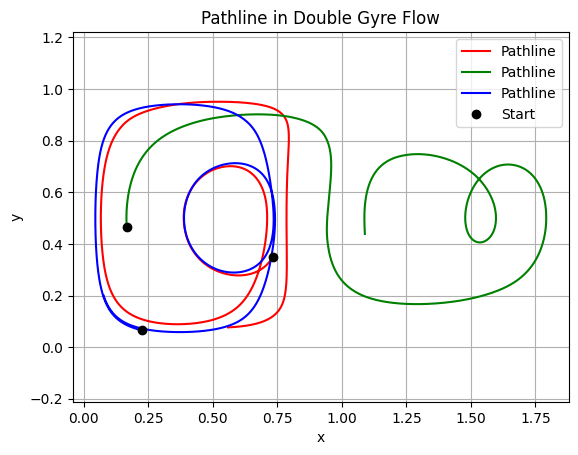

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
def f(x, t, epsilon=0.25, omega=2*np.pi/10):
    return epsilon * np.sin(omega * t) * x**2 + (1 - 2 * epsilon * np.sin(omega * t)) * x

def dfdx(x, t, epsilon=0.25, omega=2*np.pi/10):
    return 2 * epsilon * np.sin(omega * t) * x + (1 - 2 * epsilon * np.sin(omega * t))

def u(x, y, t, A=0.1):
    return -np.pi * A * np.sin(np.pi * f(x, t)) * np.cos(np.pi * y)

def v(x, y, t, A=0.1):
    return np.pi * A * np.cos(np.pi * f(x, t)) * np.sin(np.pi * y) * dfdx(x, t)

def double_gyre_ode(t, z):
    x, y = z
    return [u(x, y, t), v(x, y, t)]

x_0 = np.random.rand(3)
y_0 = np.random.rand(3)
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)
sol1 = solve_ivp(double_gyre_ode, t_span, [x_0[0], y_0[0]], t_eval=t_eval)
sol2 = solve_ivp(double_gyre_ode, t_span, [x_0[1], y_0[1]], t_eval=t_eval)
sol3 = solve_ivp(double_gyre_ode, t_span, [x_0[2], y_0[2]], t_eval=t_eval)
plt.plot(sol1.y[0], sol1.y[1], 'r-', label='Pathline')
plt.plot(sol2.y[0], sol2.y[1], 'g-', label='Pathline')
plt.plot(sol3.y[0], sol3.y[1], 'b-', label='Pathline')
plt.plot(x_0, y_0, 'ko', label='Start')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pathline in Double Gyre Flow')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


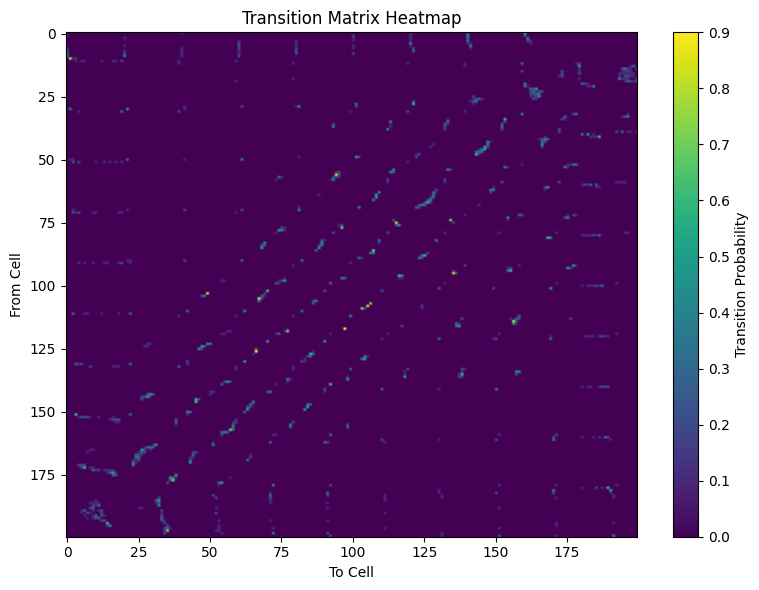

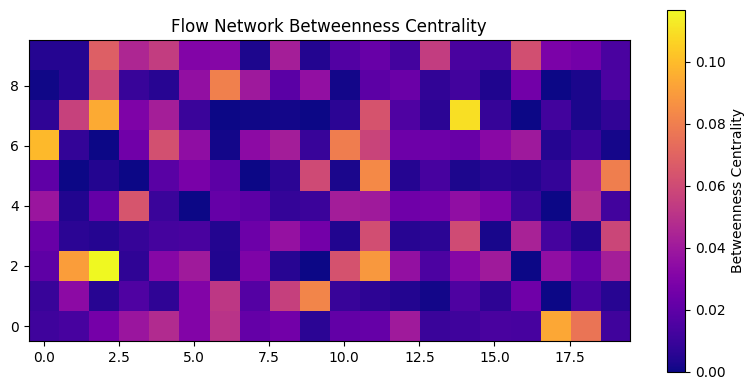

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import networkx as nx
xmin, xmax = 0, 2
ymin, ymax = 0, 1
nx_cells, ny_cells = 20, 10
num_cells = nx_cells * ny_cells

dx = (xmax - xmin) / nx_cells
dy = (ymax - ymin) / ny_cells

def get_cell_index(x, y):
    ix = int((x - xmin) / dx)
    iy = int((y - ymin) / dy)
    if 0 <= ix < nx_cells and 0 <= iy < ny_cells:
        return iy * nx_cells + ix
    return None

def f(x, t, epsilon=0.25, omega=2*np.pi/10):
    return epsilon * np.sin(omega * t) * x**2 + (1 - 2 * epsilon * np.sin(omega * t)) * x

def dfdx(x, t, epsilon=0.25, omega=2*np.pi/10):
    return 2 * epsilon * np.sin(omega * t) * x + (1 - 2 * epsilon * np.sin(omega * t))

def u(x, y, t, A=0.1):
    return -np.pi * A * np.sin(np.pi * f(x, t)) * np.cos(np.pi * y)

def v(x, y, t, A=0.1):
    return np.pi * A * np.cos(np.pi * f(x, t)) * np.sin(np.pi * y) * dfdx(x, t)

def velocity_field(t, z):
    x, y = z
    return [u(x, y, t), v(x, y, t)]

particles_per_cell = 10
initial_conditions = []
cell_ids = []

for iy in range(ny_cells):
    for ix in range(nx_cells):
        for _ in range(particles_per_cell):
            x = xmin + ix * dx + np.random.rand() * dx
            y = ymin + iy * dy + np.random.rand() * dy
            initial_conditions.append([x, y])
            cell_ids.append(iy * nx_cells + ix)

t_span = (0, 5)
t_eval = np.linspace(*t_span, 200)
final_cell_ids = []

for pos in initial_conditions:
    sol = solve_ivp(velocity_field, t_span, pos, t_eval=t_eval, method='RK45')
    x_final, y_final = sol.y[0, -1], sol.y[1, -1]
    final_cell = get_cell_index(x_final, y_final)
    final_cell_ids.append(final_cell)

A = np.zeros((num_cells, num_cells))
for i, j in zip(cell_ids, final_cell_ids):
    if j is not None:
        A[i, j] += 1

P = np.divide(A, A.sum(axis=1, keepdims=True), where=A.sum(axis=1, keepdims=True) != 0)

G = nx.DiGraph()
for i in range(num_cells):
    for j in range(num_cells):
        if P[i, j] > 0:
            G.add_edge(i, j, weight=P[i, j])

plt.figure(figsize=(8, 6))
plt.imshow(P, cmap='viridis', aspect='auto')
plt.colorbar(label='Transition Probability')
plt.title('Transition Matrix Heatmap')
plt.xlabel('To Cell')
plt.ylabel('From Cell')
plt.tight_layout()
plt.show()

centrality = nx.betweenness_centrality(G, weight='weight')
centrality_values = np.array([centrality.get(i, 0) for i in range(num_cells)])
centrality_grid = centrality_values.reshape(ny_cells, nx_cells)

plt.figure(figsize=(8, 4))
plt.imshow(centrality_grid, origin='lower', cmap='plasma')
plt.colorbar(label='Betweenness Centrality')
plt.title('Flow Network Betweenness Centrality')
plt.tight_layout()
plt.show()
